In [2]:
import imageio
f = imageio.imread('Test.jpg')

In [3]:
import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()


In [4]:
print((f.shape, f.min(), f.max(), f.dtype))
print(f.mean())

((1944, 2592, 3), 0, 255, dtype('uint8'))
94.35691273084642


In [5]:
from skimage import color, io
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np

g = color.rgb2gray(f)
plt.imshow(g, cmap=plt.cm.gray)
plt.colorbar()

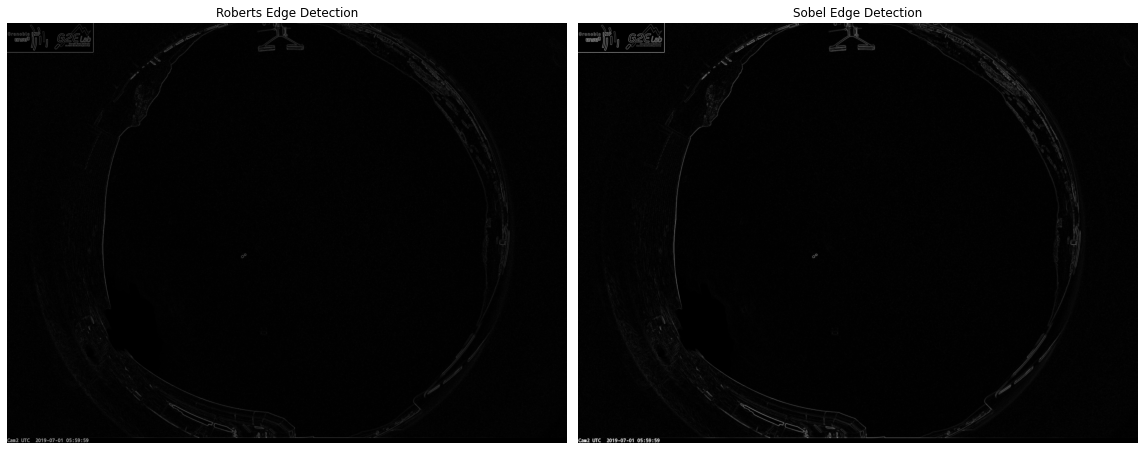

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters


image = g
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(16, 8))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
import imageio
Test2 = imageio.imread('Test2.jpg')

import matplotlib.pyplot as plt
plt.imshow(Test2)
plt.show()

from skimage import color, io
from scipy import ndimage

Test2_gray = color.rgb2gray(Test2)
plt.imshow(Test2_gray, cmap=plt.cm.gray)
plt.colorbar()

import numpy as np
from skimage import filters

image = Test2_gray
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(16, 8))

axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

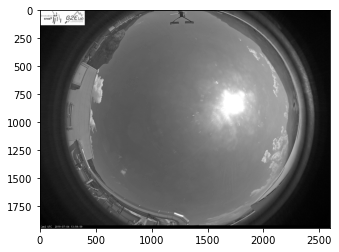

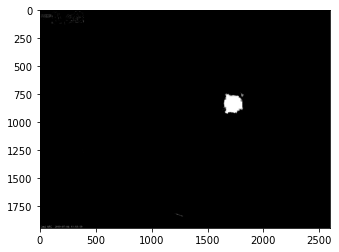

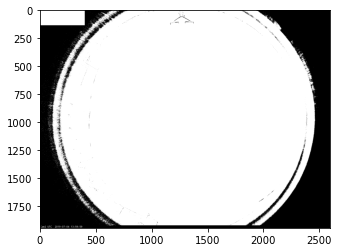

In [8]:
hauteur,largeur=Test2_gray.shape
sun=np.copy(Test2_gray)
for i in range(hauteur):
    for j in range(largeur):
        if (sun[i,j]<=0.9999):
            sun[i,j]=0
        else:
            sun[i,j]=1

eye=np.copy(Test2_gray)
for i in range(hauteur):
    for j in range(largeur):
        if (eye[i,j]<=0.15):
            eye[i,j]=0
        else:
            eye[i,j]=1

plt.imshow(Test2_gray, cmap='gray')
plt.show()

plt.imshow(sun, cmap='gray')
plt.show()

plt.imshow(eye, cmap='gray')
plt.show()


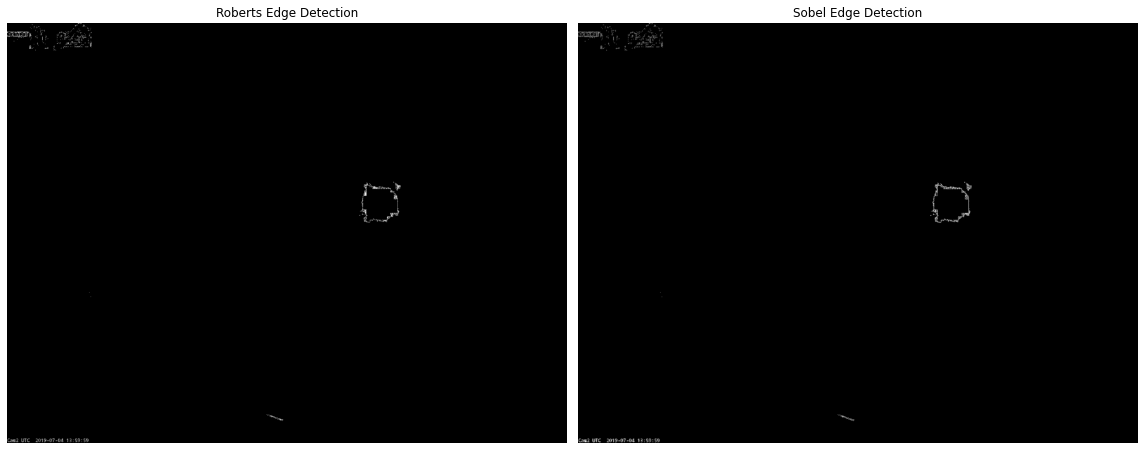

In [9]:
image = sun
edge_sun_roberts = filters.roberts(image)
edge_sun_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(16, 8))

axes[0].imshow(edge_sun_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_sun_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')


plt.tight_layout()
plt.show()

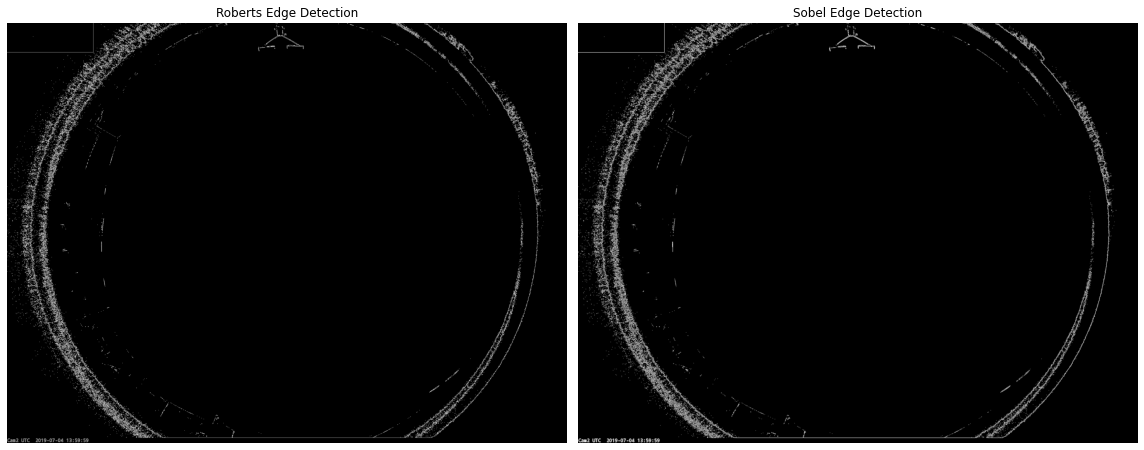

In [10]:
image = eye
edge_eye_roberts = filters.roberts(image)
edge_eye_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(16, 8))

axes[0].imshow(edge_eye_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

axes[1].imshow(edge_eye_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')


plt.tight_layout()
plt.show()

2592 1944


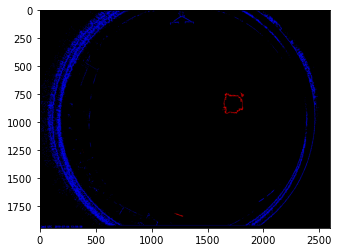

In [11]:
resultat=np.copy(Test2)
for i in range (largeur):
    for j in range(hauteur):
        if (j>140) or (i>400):
            if (edge_eye_sobel[j,i]!=0):
                resultat[j,i]=[0,0,255]
            elif (edge_sun_sobel[j,i]!=0):
                resultat[j,i]=[255,0,0]
            else:
                #resultat[j,i]=Test2[i,j]
                resultat[j,i]=[0,0,0]
        else:
            resultat[j,i]=[0,0,0]

plt.imshow(resultat)
print(largeur, hauteur)
plt.show()


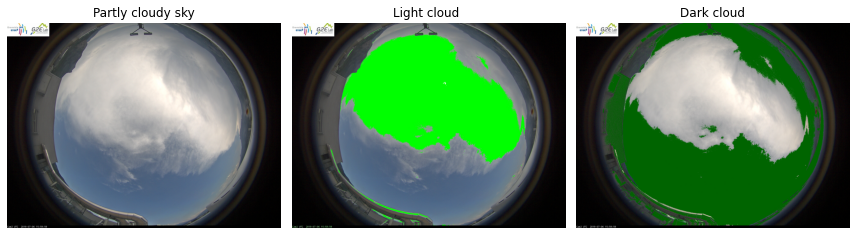

In [20]:
# Détection de la couverture nuageuse
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from scipy import ndimage

#Lecture de l'image et transposition de rgb2gray
Test3 = imageio.imread('ciel_nuageux.jpg')
Test3_gray = color.rgb2gray(Test3)

Test4 = imageio.imread('ciel_nuageux2.jpg')
Test4_gray = color.rgb2gray(Test4)

Test5 = imageio.imread('cam2 UTC 19-07-06_15-59-59-61.jpg')
Test5_gray = color.rgb2gray(Test5)


# Nuage clair compris entre 0.7 et 0.99 en nuance de gris
resultat=np.copy(Test5_gray)
nuage_clair = np.copy(Test5)

for i in range (largeur):
    for j in range(hauteur):
        if (j>140) or (i>400):
            if (resultat[j,i]<=0.999):
                if (resultat[j,i]>=0.60):
                    nuage_clair[j,i]=[0,255,0]

# Nuage foncé compris entre 0.5 et 0.7 en nuance de gris
nuage_foncé = np.copy(Test5)
resultat=np.copy(Test5_gray)

for i in range (largeur):
    for j in range(hauteur):
        if (j>140) or (i>400):
            if (resultat[j,i]<=0.60):
                if (resultat[j,i]>=0.30):
                    nuage_foncé[j,i]=[0,100,0]

#Affichage des 3 images sur une même ligne
fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True,
                         figsize=(12, 6))

axes[0].imshow(Test5)
axes[0].set_title('Partly cloudy sky')

axes[1].imshow(nuage_clair, cmap=plt.cm.gray)
axes[1].set_title('Light cloud ')

axes[2].imshow(nuage_foncé, cmap=plt.cm.gray)
axes[2].set_title('Dark cloud')

for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

#On constate que le traitement fonctionne pour le Test3 (ciel complètement couvert)
# mais pas pour le Test4 (partiellement nuageux). Il faut donc rester en RGB pour détecter la couverture nuageuse.

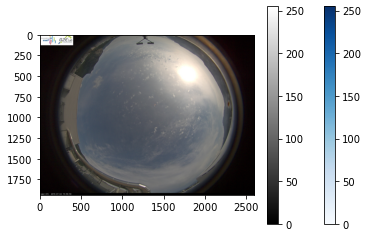

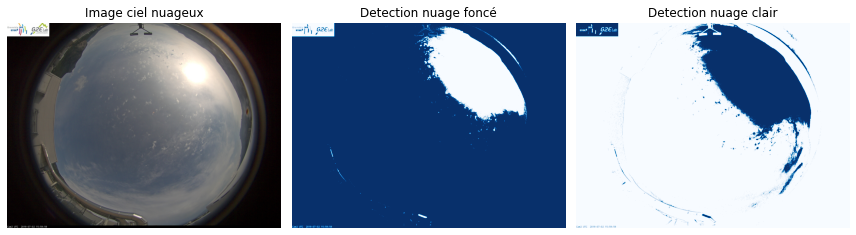

In [13]:
# Détection de la couverture nuageuse
import imageio
import matplotlib.pyplot as plt
from skimage import color, io
from scipy import ndimage

#Lecture de l'image 
Test3 = imageio.imread('ciel_nuageux.jpg')
plt.imshow(Test4[:,:,0], cmap=plt.cm.Blues)
plt.colorbar()

plt.imshow(Test4, cmap=plt.cm.gray)
plt.colorbar()

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True,
                         figsize=(12, 6))

axes[0].imshow(Test4)
axes[0].set_title('Image ciel nuageux')

axes[1].imshow(Test4[:,:,0]<150, cmap=plt.cm.Blues)
axes[1].set_title('Detection nuage foncé')

axes[2].imshow(Test4[:,:,0]>125, cmap=plt.cm.Blues)
axes[2].set_title('Detection nuage clair')

for ax in axes:
    ax.axis('off')
plt.tight_layout()
plt.show()

#En passant simplement par une seule bande rgb, cela revient à passer en échelle de gris...

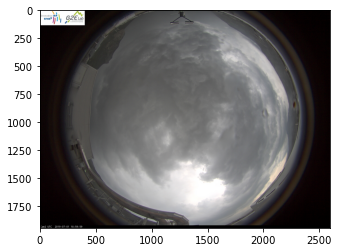

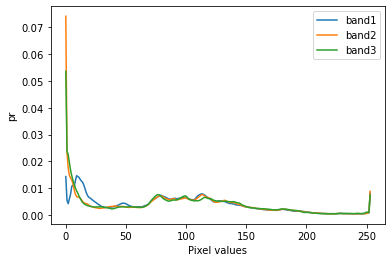

(1944, 2592, 3)


In [14]:
#Détection de la couverture nuageuse en RGB

# Load libraries
import imageio
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
from skimage import color as col

import json

#Lecture de l'image 
f = imageio.imread('ciel_nuageux.jpg')
plt.imshow(f)
plt.show()

g = f.copy()

for i in range(0,f.shape[2]):

    g[:,:,i] = g[:,:,i].astype(float)/g[:,:,i].max() * 255
    g[:,:,i] = g[:,:,i].astype(int)

    hist, bins = np.histogram(g[:,:,i].flatten(), bins=np.arange(g[:,:,i].min(),g[:,:,i].max()), density=True)
    #print(hist)
    #print(hist.shape)
    #print(sum(hist))
    plt.xlabel('Pixel values')
    plt.ylabel('pr')
    plt.plot(hist, label="band"+str(i+1))
    
plt.legend()
plt.show()
print(g.shape)

In [15]:
rapport R/B ou B/V ou V/R

SyntaxError: invalid syntax (<ipython-input-15-ded507f95612>, line 1)